In [170]:
import pandas as pd
import pyBigWig
nbct_file='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE30nnn/GSE30870/matrix/GSE30870_series_matrix.txt.gz'
md_file='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE33nnn/GSE33233/matrix/GSE33233_series_matrix.txt.gz'
nb_file='http://smithdata.usc.edu/methbase/data/Heyn-Human-NewbornCentenarian-2012/Human_CD4T-Newborn/tracks_hg19/Human_CD4T-Newborn.hmr.bb'
ct_file='http://smithdata.usc.edu/methbase/data/Heyn-Human-NewbornCentenarian-2012/Human_CD4T-100yr/tracks_hg19/Human_CD4T-100yr.hmr.bb'
data='/oak/stanford/groups/smontgom/moqri/data/meth/'

In [173]:
md=pd.read_table(md_file,skiprows=65,index_col=0)
md=md.drop('!series_matrix_table_end')
md.shape

(485577, 19)

In [177]:
md=md.T

In [179]:
md['age']=1

In [175]:
df=pd.read_table(nbct_file,skiprows=63,index_col=0)
df=df.drop('!series_matrix_table_end')
df.shape

(485577, 40)

In [180]:
meta=pd.read_table(nbct_file,skiprows=36,nrows=0,index_col=0).columns
meta=meta.str.split('.').str[0]

In [181]:
df=df.T

In [183]:
df['age']=meta

In [184]:
df['age']=df['age'].replace({'Newborns':0,'Nonagenarians':2})

In [187]:
df=df.append(md)

In [219]:
m=df[df.age==2].median()-df[df.age==1].mean()

In [220]:
m.loc['cg16867657']

0.10021117631578946

In [221]:
m=m.sort_values()
m

ID_REF
rs1416770    -0.412047
cg23169883   -0.366867
cg21139150   -0.360438
cg22712983   -0.334640
cg05398700   -0.330450
                ...   
cg24016855    0.481423
cg26475999    0.483198
cg08635406    0.497174
cg03515816    0.506447
age           1.000000
Length: 485578, dtype: float64

In [203]:
cor=df.corrwith(df.age).drop('age')

In [205]:
cor=cor.sort_values()
cor

ID_REF
cg05903736   -0.961131
cg13984040   -0.958694
cg10501210   -0.955425
cg26644674   -0.952691
cg20133890   -0.951530
                ...   
cg23500537    0.952199
cg08362785    0.953763
cg24724428    0.954871
cg18473521    0.957376
cg07553761    0.962487
Length: 485577, dtype: float64

<AxesSubplot:xlabel='age', ylabel='cg06782035'>

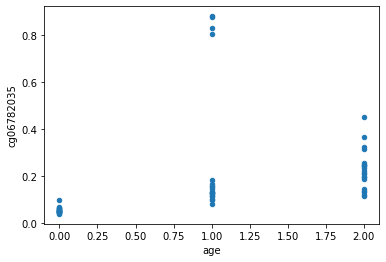

In [230]:
t=cor.index[-1]
t='cg06782035'
df[['age',t]].plot.scatter('age',t)

In [110]:
ch=2
nb=pyBigWig.open(nb_file)
nb=nb.entries("chr"+str(ch),0,-1)
nb=pd.DataFrame(nb)
nb['d']=nb[1]-nb[0]
print(nb.shape)
ct=pyBigWig.open(ct_file)
ct=ct.entries("chr"+str(ch),0,-1)
ct=pd.DataFrame(ct)
ct['d']=ct[1]-ct[0]
print(ct.shape)

(4089, 4)
(3163, 4)


In [88]:
man=pd.read_csv(data+'manm.csv',index_col=0)
print(man.shape)
cgi=man[man['Relation_to_UCSC_CpG_Island']=='Island']
print(len(cgi))

145842


In [90]:
cor

ID_REF
cg23201812   -0.997746
cg16146033   -0.997557
cg02535219   -0.997266
cg10406027   -0.996495
cg06688910   -0.996211
                ...   
cg03065175    0.992866
cg01511232    0.993769
cg00135497    0.997236
cg25241559    0.997388
age           1.000000
Length: 485578, dtype: float64

In [263]:
t=['cg17885226', 'cg12392473', 'cg27506082', 'cg23495748', 'cg11970349',
       'cg16614527', 'cg07806886', 'cg17816394', 'cg25078444', 'cg23239109',
       'cg12400336', 'cg20442599', 'cg19560758', 'cg08039301', 'cg05167251',
       'cg21200656', 'cg20491914', 'cg13788515', 'cg08160331', 'cg18322569',
       'cg25026529', 'cg11215976', 'cg04400972', 'cg27320127', 'cg07642566',
       'cg13786089', 'cg18473521', 'cg18815943', 'cg22158769', 'cg09410607',
       'cg00384539', 'cg19029181', 'cg18961681', 'cg15448975', 'cg09401099',
       'cg25236230', 'cg25124276', 'cg12377139', 'cg06829686', 'cg11220950',
       'cg14168923', 'cg00745389', 'cg00751156', 'cg09688588', 'cg17783401',
       'cg19922137', 'cg17916490', 'cg26307359', 'cg07547549', 'cg14674720',
       'cg23026864', 'cg26921969', 'cg02925367', 'cg07060551', 'cg14556303',
       'cg16419235', 'cg05991454', 'cg18247055', 'cg08578136', 'cg22285878',
       'cg13029847', 'cg23328622', 'cg03738025', 'cg20426994', 'cg00976453',
       'cg19798832', 'cg21200408', 'cg06335143', 'cg25778262', 'cg04875128',
       'cg21801378', 'cg00094518', 'cg02650266', 'cg23479922', 'cg18898125',
       'cg09499629', 'cg26290632', 'cg18257814', 'cg05758434', 'cg22851420',
       'cg06204735', 'cg25410668', 'cg13954457', 'cg17110586', 'cg26885220',
       'cg23606718', 'cg02479575', 'cg11705975', 'cg07955995', 'cg04940570',
       'cg06782035', 'cg21572722', 'cg08097417', 'cg24724428', 'cg22454769',
       'cg14361627', 'cg06784991', 'cg06639320', 'cg07544187', 'cg16867657']
t=man.loc[t]

In [264]:
nbs=[]
for i in t[t.CHR==2].MAPINFO.values:
    match=nb[(nb[0]<i) & (nb[1]>i)]
    if len(match)>0:
        nbs.append(match.iloc[0])

In [267]:
pd.DataFrame(nbs).sort_values(0)

,0,1,2,d,r
327,11809741,11810432,HYPO31113\t79,691,False
590,26914935,26916608,HYPO31376\t148,1673,False
812,39187083,39187921,HYPO31598\t112,838,False
977,47796026,47799389,HYPO31763\t284,3363,False
1048,55645518,55647898,HYPO31834\t110,2380,False
1926,106014630,106015874,HYPO32713\t100,1244,False
1926,106014630,106015874,HYPO32713\t100,1244,False
2406,131512533,131515083,HYPO33194\t144,2550,False
2856,176981980,176991040,HYPO33646\t373,9060,False
3183,207138761,207140855,HYPO33973\t141,2094,False


In [268]:
cts=[]
for i in t[t.CHR==2].MAPINFO.values:
    match=ct[(ct[0]<i) & (ct[1]>i)]
    if len(match)>0:
        cts.append(match.iloc[0])

In [269]:
pd.DataFrame(cts).sort_values(0)

,0,1,2,d
217,11809909,11810424,HYPO23553\t57,515
398,26915083,26916523,HYPO23734\t137,1440
571,39187316,39187857,HYPO23907\t70,541
701,47796283,47799185,HYPO24037\t276,2902
752,55646316,55647983,HYPO24088\t101,1667
1798,131512533,131514588,HYPO25134\t133,2055
2203,176986666,176987586,HYPO25539\t80,920
2491,207138962,207140797,HYPO25827\t137,1835
2491,207138962,207140797,HYPO25827\t137,1835
2491,207138962,207140797,HYPO25827\t137,1835


In [168]:
ct.iloc[2871]

0        233350167
1        233350967
2    HYPO26207\t90
d              800
Name: 2871, dtype: object

In [167]:
ct.iloc[2871]

0         233350979
1         233352815
2    HYPO26208\t216
d              1836
Name: 2872, dtype: object

<AxesSubplot:xlabel='ID_REF'>

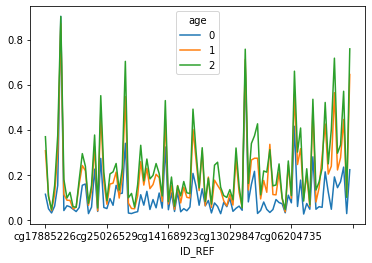

In [246]:
df[t+['age']].groupby('age').mean().T.plot.line()